# Machine Learning Group Assignment 1

In [79]:
import pandas as pd
import numpy as np
import math 
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

__1. load the data file__

In [80]:
#load the first 800 instances of the data file
wine_data = pd.read_csv("winequality-white.csv",delimiter=";", nrows =800 ) 

__2. construct a new binary column “good wine” that indicates whether the wine is good(quality of 7 or higher)__

In [81]:
# construct a new binary column “good wine" which would be true if quality >=7
wine_data["Good wine"] = np.where(wine_data['quality']>=7, 1, 0)

In [82]:
wine_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Good wine
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,7.2,0.31,0.26,7.3,0.050,37.0,157.0,0.99625,3.09,0.43,9.0,5,0
796,7.8,0.42,0.23,8.8,0.054,42.0,215.0,0.99710,3.02,0.58,9.2,6,0
797,6.9,0.24,0.33,12.5,0.046,47.0,153.0,0.99830,3.28,0.77,9.6,6,0
798,5.4,0.18,0.24,4.8,0.041,30.0,113.0,0.99445,3.42,0.40,9.4,6,0


__3. Split the data into a training set(first 400 samples), a validation set (next 200 samples), test set (last 200 samples) - no suffle needed__

In [83]:
#splitting the data
training_data, validation_data, test_data = wine_data[:400], wine_data[400:600], wine_data[600:]
training_data, validation_data, test_data

(     fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
 0              7.0              0.27         0.36            20.7      0.045   
 1              6.3              0.30         0.34             1.6      0.049   
 2              8.1              0.28         0.40             6.9      0.050   
 3              7.2              0.23         0.32             8.5      0.058   
 4              7.2              0.23         0.32             8.5      0.058   
 ..             ...               ...          ...             ...        ...   
 395            6.8              0.27         0.12             1.3      0.040   
 396            8.2              0.28         0.42             1.8      0.031   
 397            6.3              0.20         0.40             1.5      0.037   
 398            5.9              0.26         0.27            18.2      0.048   
 399            6.4              0.19         0.42             2.9      0.032   
 
      free sulfur dioxide 

__4. normalises the data according to the Z-score transform__

In [84]:
#normalises the data according to the Z-score transform
def normalises_the_data_z_score(input_data):
    data_normalised = preprocessing.scale(input_data)
    data_normalised = pd.DataFrame(data=data_normalised,columns = list(input_data.columns))
    data_normalised['Good wine'] = input_data['Good wine']
    return data_normalised
training_data_normalised = normalises_the_data_z_score(training_data)
validation_data_normalised = normalises_the_data_z_score(validation_data)
test_data_normalised = normalises_the_data_z_score(test_data)

__5. loads and trains the k-Nearest Neighbours classifiers for k = 1,2, …,100__

In [114]:
#Normalsied Training data
training_data_normalised_x = training_data_normalised.copy().drop(columns=['quality', 'Good wine']).values
training_data_normalised_y = training_data['Good wine']

#Normalsied Validation data
validation_data_normalised_x = validation_data_normalised.copy().drop(columns=['quality', 'Good wine']).values
validation_data_normalised_y = validation_data['Good wine']

#KNN classifier model for K=1,..,100:
scores_list = []
for k in range(1,101):
   classifier = KNeighborsClassifier(n_neighbors=k)
   #Training model using training dataset:
   classifier.fit(training_data_normalised_x, training_data_normalised_y)
   #Predicting response for validation dataset:
   validation_data_normalised_y_predicted = classifier.predict(validation_data_normalised_x)
   scores_list.append(1-metrics.accuracy_score(validation_data_normalised_y,validation_data_normalised_y_predicted,normalize=True))

#Creating dataframe for the classification errors for validation and training set
scores_list_df = pd.DataFrame(data=scores_list).rename(columns={0: "Classificaion error(validation data)"})
scores_list_df['k-value'] = list(range(1,101)) 

# The part below is to use the trainning data to predict the training data. I want to duplicate the chart on the 20th pages of the slides to verify the accuracy of my code.
scores_list = []
for k in range(1,101):
   classifier = KNeighborsClassifier(n_neighbors=k)
   classifier.fit(training_data_normalised_x, training_data_normalised_y)
   training_data_normalised_y_predicted = classifier.predict(training_data_normalised_x)
   scores_list.append(1-metrics.accuracy_score(training_data_normalised_y,training_data_normalised_y_predicted,normalize=True))
scores_list_df['Classificaion error(training data)'] = scores_list

In [115]:
#Model Evaluation: Classification error
scores_list_df

,Classificaion error(validation data),k-value,Classificaion error(training data)
0,0.245,1,0.0000
1,0.205,2,0.0575
2,0.215,3,0.0650
3,0.210,4,0.0975
4,0.260,5,0.1325
...,...,...,...
95,0.210,96,0.1825
96,0.210,97,0.1825
97,0.210,98,0.1850
98,0.205,99,0.1850


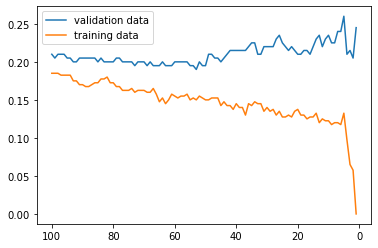

In [90]:
# Plot the classification error
plt.plot(scores_list_df['k-value'], scores_list_df['Classificaion error(validation data)'], label = "validation data")
plt.plot(scores_list_df['k-value'], scores_list_df['Classificaion error(training data)'], label = "training data")
plt.gca().invert_xaxis()
plt.legend()

__6. evaluates each classifier using the validation data set and selects the best classifier__

In [91]:
#After evalutation of classification error, the best classifier is the one with lowest classification error
best_k_value=scores_list_df['Classificaion error(validation data)'].idxmin()+1
best_k_value

53

__7. predicts the generalisation error using the test data set__

In [92]:
#Generalisation error using test set
test_data_normalised_x = test_data_normalised.copy().drop(columns=['quality', 'Good wine']).values
test_data_normalised_y = test_data['Good wine']

test_data_normalised_y_predicted = classifier.predict(test_data_normalised_x)
testing_data_error_ratio= 1-metrics.accuracy_score(test_data_normalised_y,test_data_normalised_y_predicted,normalize=True)
testing_data_error_ratio

0.20999999999999996

__8. Try a new splitting: split the data set into a training data set (first 200 samples), a
validation data set (next 200 samples), and a test data set (last 400 samples) - again,
please do not shuffle the data. Then redo steps 4 to 7. What is the new generalisation
error? Explain what you find__

In [116]:
#splitting the data into training,validation and test data
training, validation, test = wine_data[:200], wine_data[200:400], wine_data[400:]
training, validation, test

(     fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
 0              7.0              0.27         0.36            20.7      0.045   
 1              6.3              0.30         0.34             1.6      0.049   
 2              8.1              0.28         0.40             6.9      0.050   
 3              7.2              0.23         0.32             8.5      0.058   
 4              7.2              0.23         0.32             8.5      0.058   
 ..             ...               ...          ...             ...        ...   
 195            6.4              0.30         0.45             3.5      0.197   
 196            6.4              0.29         0.44             3.6      0.197   
 197            6.8              0.26         0.24             7.8      0.052   
 198            7.1              0.32         0.24            13.1      0.050   
 199            6.8              0.26         0.24             7.8      0.052   
 
      free sulfur dioxide 

In [117]:
#normalising the data according to the Z-score transformation
training_normalised = normalises_the_data_z_score(training)
validation_normalised = normalises_the_data_z_score(validation)
test_normalised = normalises_the_data_z_score(test)

In [124]:
training_normalised_x = training_normalised.copy().drop(columns=['quality', 'Good wine']).values
training_normalised_y = training['Good wine']

validation_normalised_x = validation_normalised.copy().drop(columns=['quality', 'Good wine']).values
validation_normalised_y = validation['Good wine']

#KNN classifier model for K=1,..,100:
scores_list2 = []
for k in range(1,101):
   classifier = KNeighborsClassifier(n_neighbors=k)
   #Training model using training dataset:
   classifier.fit(training_normalised_x, training_normalised_y)
   #Predicting response for validation dataset:
   validation_normalised_y_predicted = classifier.predict(validation_normalised_x)
   scores_list2.append(1-metrics.accuracy_score(validation_normalised_y,validation_normalised_y_predicted,normalize=True))


scores_list2_df = pd.DataFrame(data=scores_list2).rename(columns={0: "Classificaion error(validation data)"})
scores_list2_df['Classificaion error(training data)'] = scores_list2
scores_list2_df['k-value'] = list(range(1,101)) 

In [125]:
#Using training data to predict the training data
scores_list2 = []
for k in range(1,101):
   classifier = KNeighborsClassifier(n_neighbors=k)
   classifier.fit(training_normalised_x, training_normalised_y)
   training_normalised_y_predicted = classifier.predict(training_normalised_x)
   scores_list2.append(1-metrics.accuracy_score(training_normalised_y,training_normalised_y_predicted,normalize=True))
scores_list2_df['Classificaion error(training data)'] = scores_list2

In [126]:
#Model Evaluation: Classification error
scores_list2_df

,Classificaion error(validation data),Classificaion error(training data),k-value
0,0.235,0.000,1
1,0.175,0.045,2
2,0.170,0.060,3
3,0.180,0.065,4
4,0.185,0.080,5
...,...,...,...
95,0.225,0.160,96
96,0.225,0.160,97
97,0.225,0.160,98
98,0.225,0.160,99


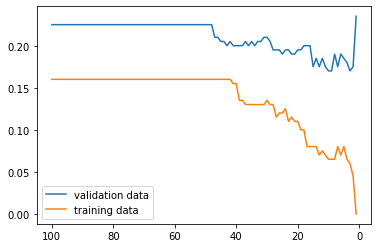

In [127]:
# Plot the classification error
plt.plot(scores_list2_df['k-value'], scores_list2_df['Classificaion error(validation data)'], label = "validation data")
plt.plot(scores_list2_df['k-value'], scores_list2_df['Classificaion error(training data)'], label = "training data")
plt.gca().invert_xaxis()
plt.legend()

In [128]:
#Best value of K is one that results in lowest classification error
best_k_value=scores_list2_df['Classificaion error(validation data)'].idxmin()+1
best_k_value

3

In [129]:
test_normalised_x = test_normalised.copy().drop(columns=['quality', 'Good wine']).values
test_normalised_y = test['Good wine']

test_normalised_y_predicted = classifier.predict(test_normalised_x)
testing_error_ratio= 1-metrics.accuracy_score(test_normalised_y,test_normalised_y_predicted,normalize=True)
testing_error_ratio

0.21250000000000002

__Explain what you find__
<br> The first split of the data into 400:200:200 results in a slightly better performance on the test set i.e lower generalisation error than the second split of 200:200:400, 